# Derivatives

<a name="derivative_definition"></a>
The **derivative** of a function $f(x)$ is another function, defined in terms of a limiting expression:

$$f'(x) \equiv \frac{df}{dx}(x) \equiv \lim_{\delta x \rightarrow 0} \, \frac{f(x + \delta x) - f(x)}{\delta x}.$$

If the limiting expression give a unique and well-defined result within some domain of $x$, then we say that the derivative "exists" in that domain.  We also say that $f(x)$ is **differentiable** in that domain.  It can be shown that a differentiable function is automatically [continuous](00_mathfunctions.ipynb#continuity). ([Try proving it](#exercises)!) For the purposes of dimensional analysis, the derivative of a function $f(x)$ has the units of the original function, divided by the units of $x$.

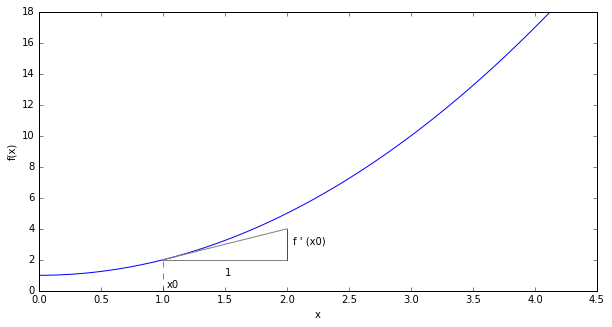

In [25]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace
import matplotlib.pyplot as plt

def plot_derivative(x0):
    ## Parameters for the plot
    xmin, xmax, ymin, ymax = 0., 4.5, 0., 18.
    x = linspace(xmin, xmax, 100)
    y = x*x+1
    x1, y0, dydx = x0+1, x0*x0+1, 2*x0

    ## Generate plot lines
    plt.figure(figsize=(10,5))
    plt.plot(x, y)
    plt.plot([x0, x1], [y0, y0+dydx], color='grey')
    plt.plot([x0, x1], [y0, y0], color='grey')
    plt.plot([x1, x1], [y0, y0+dydx], color='red')
    plt.plot([x0, x0], [0, y0], '--', color='grey')
    
    ## Place text labels for the schematic
    plt.text(x0 + 0.03, 0 + 0.2, 'x0')
    plt.text(x0+0.5, y0-1, '1')
    plt.text(x1+0.05, y0+0.5*dydx, "f ' (x0)")
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('x')
    plt.ylabel('f(x)')

interact(plot_derivative,
         x0=FloatSlider(min=1.0, max=3.0, step=0.01, value=1.0));

Second-order and higher-order derivatives are defined by repeating the derivative procedure.  Graphically, the derivative represents the "slope" of the graph of $f(x)$, while the second derivative represents the "curvature".  For example, the graph above has positive second derivative, because it is upward-curving.

<a name="composition_rules"></a>
Derivatives obey several elementary composition rules:

$$\begin{aligned}\frac{d}{dx}\left[\alpha\, f(x) + \beta\, g(x)\right] &= \alpha\, f'(x) + \beta\, g'(x) \quad &\textrm{(linearity)}& \\   \frac{d}{dx}\left[f(x) \, g(x)\right] &= f(x) \, g'(x) + f'(x) \, g(x) &\textrm{(product}\;\textrm{rule)}& \\   \frac{d}{dx}\left[f(g(x))\right] &= f'(g(x)) \, g'(x) &\textrm{(chain}\;\textrm{rule)}&\end{aligned}$$

These can all be proven by direct substitution into the definition of the derivative, and taking appropriate orders of limits.  With the aid of these rules, we can prove various standard results, such as the "power rule" for derivatives:
$$\frac{d}{dx} \big[x^a\big] = a x^{a-1}.$$

The linearity of the derivative operation has the important implication that derivatives "commute" with sums, i.e. you can move them to the left or right of summation signs. For example, we can use this to show that the [exponential function](00_mathfunctions.ipynb#exponential) is its own derivative:
$$\frac{d}{dx} \left[\exp(x)\right] = \frac{d}{dx} \sum_{n=0}^\infty\frac{x^n}{n!} = \sum_{n=0}^\infty\frac{d}{dx} \, \frac{x^n}{n!} = \sum_{n=1}^\infty \frac{x^{n-1}}{(n-1)!} =\exp(x)$$

Derivatives also "commute" with limit expressions.  For example, we can use this on the alternative definition of the exponential function:

$$\begin{aligned}\frac{d}{dx} \left[\exp(x)\right] &= \frac{d}{dx} \lim_{n\rightarrow\infty} \left(1+\frac{x}{n}\right)^n = \lim_{n\rightarrow\infty} \frac{d}{dx} \left(1+\frac{x}{n}\right)^n \\ &= \lim_{n\rightarrow\infty} \left(1+\frac{x}{n}\right)^{n-1} \;= \exp(x)\end{aligned}$$

## Taylor series

A function is **infinitely differentiable** if all orders of derivatives are well-defined (i.e., first derivative, second derivative, etc.).  Not all functions behave this way: for example, $f(x) = |x|$ has a first derivative which is discontinuous at $x = 0$, which means that it has no well-defined second derivative at that point.

If a function is infinitely differentiable, then near any point $x_0$ it can be written out in a **Taylor series**:

$$\begin{aligned}f(x) \;&=\; \sum_{n=0}^\infty \frac{(x-x_0)^n}{n!} \left[\frac{d^n}{dx^n} f\right](x_0) \\&=\; f(x_0) + (x-x_0)\, f'(x_0) + \frac{(x-x_0)^2}{2} f''(x_0) + \cdots\end{aligned}$$
Here, the "zeroth derivative" refers to the function itself.  The Taylor series can be derived by assuming that $f(x)$ can be written out as a general polynomial involving terms of the form $(x-x_0)^n$; from the definition of 
the derivative, we can then obtain the polynomial coefficients.  Because we are only ''assuming'' the validity of the the polynomial series, there is no guarantee that the Taylor series converges to the true value for any value of $x$.  For many functions, the Taylor series converges only if $|x-x_0|$ is smaller than a certain amount.

<a name="taylor_useful"></a>

<table width="90%">
<tr>
<td colspan=2>**Useful Taylor Series**</td>
</tr><tr>
<td>$$\displaystyle\frac{1}{1-x} = 1 + x + x^2 + x^3 + \cdots\mathrm{for} \; |x| < 1 $$</td>
<td>$$\displaystyle\ln(1-x) = -x - \frac{x^2}{2} - \frac{x^3}{3} - \frac{x^4}{4} - \cdots \quad \mathrm{for} \; |x| < 1$$</td>
</tr><tr>
<td>$$\displaystyle\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$</td>
<td>$$\displaystyle\sinh(x) = x + \frac{x^3}{3!} + \frac{x^5}{5!} + \frac{x^7}{7!} + \cdots$$</td>
</tr><tr>
<td>$$\displaystyle\cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots$$</td>
<td>$$\displaystyle\cosh(x) = 1 + \frac{x^2}{2!} + \frac{x^4}{4!} + \frac{x^6}{6!} + \cdots$$</td>
</tr></table>

Apart from the first row, the others are actually exact for all $x$.  This is because the [sine/cosine functions](00_mathfunctions.ipynb#trigonometric) and [hyperbolic functions](00_mathfunctions.ipynb#hyperbolic) are "entire", i.e. their Taylor series converge everywhere in the domain. If you pick a large value of $x$, however, you may have to sum to a very high order before the series converges to an accurate value. As an example, the following plot compared the $\sin(x)$ function to its series expansion.

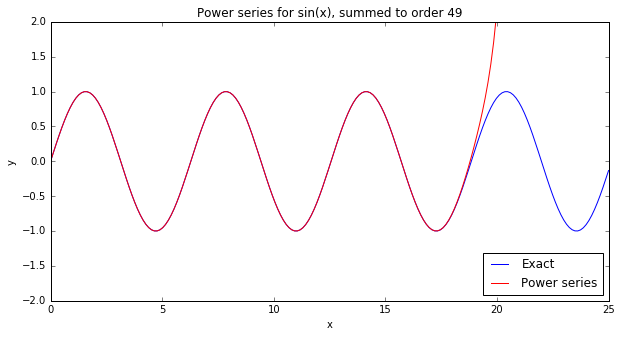

In [1]:
%matplotlib inline
from ipywidgets import interact, IntSlider
from numpy import linspace, zeros, sin
from scipy.misc import factorial
import matplotlib.pyplot as plt

def plot_sine_series(N):
    x = linspace(0, 25, 200)
    y = sin(x)

    ## Power series, summed over 1, 3, 5, ..., N
    ys = zeros(len(x))
    for n in range(1, N+1, 2):
        ys += x**n * (-1)**(0.5*(n-1)) / factorial(n)

    plt.figure(figsize=(10,5))
    plt.plot(x, y, color='blue', label='Exact')
    plt.plot(x, ys, color='red', label='Power series')
    plt.title('Power series for sin(x), summed to order {}'.format(N))
    plt.ylim(-2, 2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='lower right')

interact(plot_sine_series,
         N=IntSlider(min=1, max=49, step=2, value=4));

## Ordinary differential equations<a name="ODE"></a>

A differential equation is an equation involving several different derivatives of a function.  For example,

$$\frac{df}{dx} = \kappa f(x)$$

involves both $f(x)$ and its first derivative.  Specifically, this is an **ordinary differential equation**, because $f(x)$ is a function involving a single input number $x$.

There is no single fixed procedure for solving differential equations.  In some cases, we can guess the solution: for example, we might happen to know that the above differential equation has solutions of the form

$$f(x) = A \exp(\kappa x).$$

There are methods, such as [Green's functions](10_greenfunctions.ipynb), for generating solutions to certain special classes of differential equation.  But many differential equations simply cannot be solved analytically, and can only be solved numerically.

When confronted with an ordinary differential equation, typically the first thing you should look for is the order of the highest derivative appearing in the equation (this is also called the **order** of the differential equation).  If the equation has order $N$, then its **general solution** contains $N$ independent parameters, or "constants of integration".  If you happen to be able to guess a solution to the equation, but that solution does not contain $N$ parameters, then you know that your solution isn't the most general one.  In the above example, the order is one; we guessed the solution $f(x) = A \exp(x)$, which has one parameter $A$.  So we know our work is done: there is no solution more general than the one we found.

A **specific solution** to a differential equation is a solution in which there are no independent parameters.  This can be done by assigning numerical values to the independent parameters of the general solution.  These numerical values are often specified in terms of "boundary conditions".  For example, for a second-order differential equation, I might give you $f(x = 0)$ and $f'(x = 0)$, and ask you to find the corresponding specific solution.  Alternatively, I could give you $f(x = 0)$ and $f(x = 1)$, or any other combination of two conditions.  For an ordinary differential equation of order $N$, we need $N$ boundary conditions to arrive at a specific solution.

<a name="example2"></a>
<table width=75%>
<tr><td>**Example**</td></tr>
<tr><td>The following differential equation describes a [damped harmonic oscillator](04_complex_oscillations.ipynb):<br/>$$\frac{d^2 x}{dt^2} + 2\gamma\frac{dx}{dt} + \omega_0^2 x(t) = 0.$$<br/>Here, note that $x(t)$ is the function, and $t$ is the input variable, unlike our previous notation where $x$ was the input variable; don't get confused!  This equation is obtained from Newton's second law, for an object moving in one dimension subject to a damping force and a restoring force.  Thus $x(t)$ represents the position as a function of time.  We come back to this equation [when studying the damped harmonic oscillator in greater detail](04_complex_oscillations.ipynb).</td></tr></table>


## Partial derivatives

So far, we have focused on functions which take a single input.  Functions can also take multiple inputs; for instance, a function $f(x,y)$ maps two input numbers, $x$ and $y$, and outputs a number.  In general, the inputs are allowed to vary independently of one another.  The **partial derivative** of such a function is its derivative with respect to one of its inputs, keeping the other input fixed.  For example,

$$f(x,y) = \sin(2x - 3 y^2)$$

has partial derivatives

$$\frac{\partial f}{\partial x} = 2\cos(2x-3y^2), \quad \frac{\partial f}{\partial y} = - 6\cos(2x-3y^2).$$

### Change of variables<a name="change_of_variables"></a>

Above, we saw that single-variable functions obey a derivative composition rule

$$\frac{d}{dx}\, f\big(g(x)\big) = g'(x) \, f'\big(g(x)\big).$$

This composition rule has a important generalization for partial derivatives, which is related to the physical concept of a **change of coordinates**. Suppose we have a function $f(x,y)$ which takes two inputs $x$ and $y$, and wish to express them using a different coordinate system denoted (say) $u$ and $v$.  In general, each coordinate in the old system would depend on ''both'' coordinates in the new system:

$$x = x(u,v), \quad y = y(u,v).$$

Expressed in the new coordinates, the function is

$$F(u,v) \equiv f\big(x(u,v), y(u,v)\big).$$

It can then be shown that this transformed function's partial derivatives obey the composition rule

$$\begin{aligned}\frac{\partial F}{\partial u} &= \frac{\partial f}{\partial x} \frac{\partial x}{\partial u} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial u}\\ \frac{\partial F}{\partial v} &= \frac{\partial f}{\partial x} \frac{\partial x}{\partial v} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial v}.\end{aligned}$$

On the right-hand side of these equations, the partial derivatives are to be expressed in terms of the new coordiantes $(u,v)$.  For example,

$$\frac{\partial f}{\partial x} = \left.\frac{\partial f}{\partial x}\right|_{x = x(u,v), \;y= y(u,v)}$$

The generalization of this rule to more than two inputs is straightforward.  For a function $f(x_1, \dots, x_N)$, a change of coordinates $x_i = x_i(u_1, \dots, u_N)$ involves the composition

$$F(u_1, \dots, u_N) = f\big(x_1(u_1,\dots,u_N\big), \dots), \quad \frac{\partial F}{\partial u_i} = \sum_{j=1}^N \frac{\partial x_j}{\partial u_i} \frac{\partial f}{\partial x_j}.$$

<table width=75%>
<tr><td>**Example**</td></tr>
<tr><td>
In two dimensions, Cartesian and polar coordinates are related by the formulas<br/>$$x = r\cos\theta, \quad y = r\sin\theta.$$<br/>If we have a function $f(x,y)$, we can re-write it in polar coordinates as $F(r,\theta)$. The partial derivatives are related by<br/>$$\begin{aligned}\frac{\partial F}{\partial r} &= \frac{\partial f}{\partial x} \frac{\partial x}{\partial r} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial r} = \frac{\partial f}{\partial x} \cos\theta + \frac{\partial f}{\partial y} \sin\theta. \\ \frac{\partial F}{\partial \theta} &= \frac{\partial f}{\partial x} \frac{\partial x}{\partial \theta} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial \theta} = -\frac{\partial f}{\partial x} r\,\sin\theta + \frac{\partial f}{\partial y} r\cos\theta.\end{aligned}$$<br/>This is often written in matrix form as:<br/>$$\displaystyle\begin{bmatrix}\partial F/\partial r \\ (1/r) \, \partial F/\partial \theta\end{bmatrix} = \begin{bmatrix}\cos(\theta) & \sin(\theta)\\ -\sin(\theta) & \cos(\theta) \end{bmatrix}\, \begin{bmatrix}\partial f/\partial x \\ \partial f/\partial y\end{bmatrix}.$$</td></tr></table>


### Partial differential equations<a name="PDE"></a>

A partial differential equation is a differential equation which involves multiple partial derivatives (as opposed to an *ordinary* differential which involves only derivatives with respect to a single variable).  An example of a partial differential equation is Laplace's equation,

$$\frac{\partial^2 \Phi}{\partial x^2} + \frac{\partial^2 \Phi}{\partial y^2} + \frac{\partial^2 \Phi}{\partial z^2}= 0,$$

which describes the electrostatic potential $\Phi(x,y,z)$ at position $(x,y,z)$, in the absence of any electric charges.  Partial differential equations are significantly harder to solve than ordinary differential equations.  For example, boundary conditions are more complicated to specify: whereas each boundary condition for an ordinary differential equation consists of a single number (e.g., the value of $f(x)$ at some point $x = x_0$), each boundary condition for a partial differential equation consists of a *function* (e.g., the values of $\Phi(x,y,z)$ along some curve $g(x,y,z) = 0$).

## Exercises
<a name="exercises"></a>

<ol>
<li>Prove that

$$\frac{d}{dx} [x^y] = y x^{y-1}, \quad\mathrm{for}\;\;x \in \mathbb{R}^+, \; y \notin \mathbb{N},$$

starting from the previously-discussed [definition of non-natural powers](00_mathfunctions.ipynb#exponential) in terms of the exponential and logarithm functions.</li>
<li>Consider $f(x) = \tanh(\alpha x)$.
<ol style="list-style-type:lower-alpha"><li>Sketch $f(x)$ versus $x$, for two cases: (i) $\alpha = 1$ and (ii) $\alpha \gg 1$.</li>
<li>Sketch the derivative function $f'(x)$ for the two cases, based on your sketches in part (a) (i.e., without evaluating the derivative directly).</li>
<li>Evaluate the derivative function, and verify that the result matches your sketches in part (b).</li></ol></li>
<li>
Prove geometrically that the derivatives of the sine and cosine functions are:<br/>$$\frac{d}{dx}\sin(x) = \cos(x), \quad\frac{d}{dx}\cos(x) = -\sin(x).$$<br/>Hence, derive their [series expansions](#taylor_useful).</li>
<li>For each of the following functions, derive the Taylor series around $x = 0$:
<ol style="list-style-type:lower-alpha">
<li>$f(x) = \ln\left[\alpha \cos(x)\right]$, to the first 3 non-vanishing terms.</li>
<li>$f(x) = \cos\left[\pi\exp(x)\right]$, to the first 4 non-vanishing terms.</li>
<li>$f(x) = \frac{1}{\sqrt{1 \pm x}}$, to the first 4 non-vanishing terms.  Keep track of the signs (i.e., $\pm$ versus $\mp$).</li></ol></li>
<li>For each of the following functions, sketch the graph and state the domains over which the function is differentiable:
<ol style="list-style-type:lower-alpha">
<li>$f(x) = |\sin(x)|$</li>
<li>$f(x) = \left[\tan(x)\right]^2$</li>
<li>$f(x) = \frac{1}{1-x^2}$</li>
</ol></li>
<li>Let $\vec{v}(x)$ be a ''vectorial'' function which takes an input $x$ (a number), and gives an output value $\vec{v}$ that is a 2-component vector.  The derivative of this vectorial function is defined in terms of the derivatives of each vector component:

$$\vec{v}(x) = \begin{bmatrix}v_1(x) \\ v_2(x)\end{bmatrix} \;\; \Rightarrow \;\; \frac{d\vec{v}}{dx} = \begin{bmatrix}dv_1/dx \\ dv_2/dx\end{bmatrix}.$$

Now suppose $\vec{v}(x)$ obeys the vectorial differential equation

$$\frac{d\vec{v}}{dx} = \mathbf{A} \vec{v}, \quad\mathrm{where}\;\;\mathbf{A} = \begin{bmatrix}A_{11} & A_{12} \\ A_{21} & A_{22}\end{bmatrix}.$$
</li>

<ol style="list-style-type:lower-alpha">
<li>How many independent numbers do we need to specify for the general solution?</li>
<li>Let $\vec{u}$ be one of the eigenvectors of $\mathbf{A}$, with eigenvalue $\lambda$:

$$\mathbf{A} \vec{u} = \lambda \vec{u}.$$

Show that $\vec{v}(x) = \vec{u}\, e^{\lambda x}$ is a specific solution to the vectorial differential equation.  Hence, find the general solution.
</li>
</ol>
<div id="prob_continuity"></div>
<li>Show that if a function is [differentiable](#derivative_definition), then it is also [continuous](00_mathfunctions.ipynb#continuity).
</li>
</ol>